# Prédiction de popularité de musique Spotify


In [128]:
# Chargement des donées
data = pd.read_csv('D:\dataset.csv')
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [123]:
target = 'popularity'
features = [i for i in data.columns if i not in [target]]

nu = data[features].nunique().sort_values()

#catégories numériques et qualitatives
num_features = []; cat_features = []; nnf = 0; ncf = 0; 

for i in range(data[features].shape[1]):
    if nu.values[i]<=16:cat_features.append(nu.index[i])
    else: num_features.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Dataset has {} numerical & {} categorical features.'.format(len(num_features),len(cat_features)))


Inference: The Dataset has 10 numerical & 5 categorical features.


In [124]:


display(data.describe())

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,30.236200,2.201539e+05,0.070300,0.576151,0.606003,5.373300,-8.261623,0.650100,0.071031,0.349525,0.085954,0.186482,0.518816,120.396281,3.889300,4.500000
std,31.072923,1.049057e+05,0.255665,0.163541,0.252502,3.544941,5.579186,0.476962,0.071842,0.344061,0.244526,0.154700,0.239217,30.270149,0.433202,2.872425
min,0.000000,0.000000e+00,0.000000,0.000000,0.000071,0.000000,-41.531000,0.000000,0.000000,0.000003,0.000000,0.015000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.747032e+05,0.000000,0.467000,0.447000,2.000000,-9.484000,0.000000,0.034600,0.037000,0.000000,0.094900,0.332000,96.012000,4.000000,2.000000
50%,24.000000,2.075400e+05,0.000000,0.592000,0.657500,6.000000,-6.567000,1.000000,0.045500,0.206000,0.000005,0.126000,0.523000,119.992000,4.000000,4.500000
75%,63.000000,2.461420e+05,0.000000,0.696250,0.807000,8.000000,-4.787000,1.000000,0.072725,0.661000,0.001162,0.234000,0.701000,139.906000,4.000000,7.000000
max,100.000000,3.340672e+06,1.000000,0.953000,0.998000,11.000000,1.023000,1.000000,0.924000,0.996000,0.982000,0.989000,0.994000,214.024000,5.000000,9.000000


In [24]:
# valeurs manquantes
data.isna().sum()


popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [26]:
# Données dupliquées

data.duplicated().sum()

1921

# Part II : Prédiction de la popularité de musique

### Analyse de données exploratioire (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import linear_model, tree
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import random
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed
import lazypredict
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(11.7,8.27)})

To be in the samee wave wiht the first part, we try to keep the same dataset with the same gender of music

In [59]:
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
16000,58,298266,0,0.643,0.268,11,-15.073,0,0.0900,0.593,0.000002,0.316,0.620,143.813,4,9
16001,59,482586,0,0.484,0.898,0,-4.132,1,0.1640,0.365,0.000000,0.091,0.680,91.975,4,9
16002,54,219437,0,0.608,0.638,11,-6.008,0,0.0292,0.581,0.017200,0.448,0.439,140.109,4,9
16003,68,299146,0,0.695,0.293,11,-16.278,0,0.0431,0.596,0.015800,0.132,0.637,143.804,4,9
16004,59,387716,0,0.583,0.308,7,-18.303,0,0.0465,0.581,0.010600,0.257,0.241,118.226,4,9


In [64]:
# Chargement des donées
data = pd.read_csv('D:\dataset.csv')

# Supprimer les variables qui ne sont pas utiles
data = data.drop(columns=['track_name','track_id','artists','Unnamed: 0','album_name'])
data.shape
data.shape[1]

#Grader les class de musqiues les plus populaire
genres = ['classical','country', 'house', 'metal', 'k-pop', 'jazz', 'rock', 'pop', 'r-n-b', 'reggae']
genres.sort()
data = data.loc[data['track_genre'].isin(genres)]
data["explicit"] = data["explicit"].astype(int)

classes = list(set(data.track_genre))
data['track_genre'] = data['track_genre'].apply(lambda x: classes.index(x))
#data  = data.reset_index()

In [65]:

import plotly.express as px
fig = px.histogram(data, x="popularity")
fig.show()

nous pouvons voir que nous avons une grande concentration sur la valeur '0'

Nous essaierons de nombreuses stratégies pour mieux adapter les données.

# Première stratégie: Validation croisée avec toutes les données

### X et Y sans échelle


Je vais essayer de sélectionner quelques modèles en utilisant une validation croisée plusieurs fois, principalement sur l'ensemble de données avec la forte concentration sur 0, et sans mettre les données à l'échelle. 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error

In [66]:
X = data.drop(['popularity'], axis=1)
y = data.popularity


 Dictionnaire contenant les différentes méthodes de regression et leur ligne de commande


In [67]:
dict_regressor = {
    "Linreg": LinearRegression(),

    "kNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "DT" : DecisionTreeRegressor(),
    "GBC": GradientBoostingRegressor(),
    "RF": RandomForestRegressor(n_jobs=-1),
    "AB": AdaBoostRegressor(),
    "LGBMR" : LGBMRegressor(n_jobs=-1),
    "XG" : XGBRegressor(n_jobs=-1) ,
}


In [68]:


from sklearn.model_selection import cross_val_score
def run_regresor(reg,kf,X,Y):
  resultsMoyenne=[]
  resultsEcartType=[]
  for i in reg:
    c = reg[i]
    cv_mse = cross_val_score(c, X, Y, cv=kf,scoring='neg_mean_squared_error')
    #cv_r2 = cross_val_score(c, X, Y, cv=kf,scoring='r2')
    #resultsMoyenne.append(np.mean(cv_mse))
    #resultsEcartType.append(np.std(cv_mse))

    print("mse for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_mse), np.std(cv_mse)))
    #print("r2 for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_r2), np.std(cv_r2)))
  return resultsMoyenne , resultsEcartType



scoring = "neg_mean_squared_error" dans la fonction de validation renverra des valeurs de sortie négatives. Par exemple, si l'erreur quadratique moyenne est de 5, elle renverra -5. Si l'erreur quadratique moyenne est de 9, elle renverra -9. Cela est dû au fait que la fonction cross_val_score fonctionne sur la base de la maximisation. Tous les objets évaluateurs suivent la convention selon laquelle des valeurs de retour plus élevées sont meilleures que des valeurs de retour plus faibles.

In [69]:
import sklearn
np.random.seed(0)

kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
rest = run_regresor(dict_regressor,kf,X,y)

mse for Linreg is: -886.038 +/- 8.547
mse for kNN is: -910.644 +/- 20.805
mse for SVM is: -1073.761 +/- 18.761
mse for DT is: -904.310 +/- 30.114
mse for GBC is: -672.193 +/- 6.159
mse for RF is: -518.627 +/- 11.708
mse for AB is: -801.378 +/- 18.091
mse for LGBMR is: -570.111 +/- 7.414
mse for XG is: -562.848 +/- 10.650


On obtient de très mauvais résultats pour nos modèles.

Je vais essayer de mettre à l'échelle l'ensemble des données et de voir les résultats

In [74]:
from sklearn.preprocessing import MinMaxScaler

data_scaled = data.copy()
scaler = MinMaxScaler()
num_features = ['popularity','duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
data_scaled[num_features]= scaler.fit_transform(data_scaled[num_features])

In [75]:
X_scaled = data_scaled.drop(['popularity'], axis=1)
y = data.popularity

In [76]:
import sklearn
np.random.seed(0)
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=0)

rest = run_regresor(dict_regressor,kf,X_scaled,y)

mse for Linreg is: -886.038 +/- 8.547
mse for kNN is: -721.919 +/- 16.500
mse for SVM is: -889.698 +/- 14.398
mse for DT is: -908.100 +/- 32.614
mse for GBC is: -672.748 +/- 6.758
mse for RF is: -518.070 +/- 11.570
mse for AB is: -800.918 +/- 17.393
mse for LGBMR is: -568.073 +/- 7.616
mse for XG is: -562.918 +/- 10.313


Nous pouvons clairement voir que le fait de classer les données affecte considérablement les résultats, de sorte que les scores de mse sont meilleurs.       
Nous pouvons choisir les trois meilleurs modèles (RF, LGMB, XGB) pour essayer d'améliorer leurs scores et visualiser les résultats.


Après la sélection des modèles, je passe à l'entrainement des trois modèles sur toutes les données.

In [30]:
def model_metrics(model, X_test , y_test , decimals = 5, X_train = X_train, y_train = y_train):
    start  = datetime.now()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = np.round(r2_score(y_test, y_pred),decimals)
    ecart = sum(np.abs(y_pred-y_test)<=10)/len(y_test)
    return {'MSE': MSE, "RMSE" : RMSE , 'MAE' : MAE ,
            'R2': R2, 'ecart moins de 10' : sum(np.abs(y_pred-y_test)<=10)/len(y_test),
            'time': (datetime.now() - start).seconds}

In [31]:
# sploit train test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, test_size=0.2)

X_train.shape , y_train.shape, X_test.shape, y_test.shape

((8000, 15), (8000,), (2000, 15), (2000,))

On découpe ici avec la répartiton 80% des données d'apprentissage 20% des données de test,y_test stockant l'ensmeble des étiquettes de test correspondant à notre échantillon de test.


In [32]:
XGB_model = XGBRegressor(n_jobs = -1)
RF_model = RandomForestRegressor(n_jobs=-1)
LGBM_model = LGBMRegressor(n_jobs=-1)


results = pd.DataFrame(
    [
        model_metrics(XGB_model, X_test, y_test ),
        model_metrics(RF_model, X_test , y_test),
        model_metrics(LGBM_model, X_test, y_test)
    ], 
    index = [ 'XGBRegressor','RandomForestRegressor','LGBMRegressor']) \
.reset_index() \
.rename(columns={'index':'model'})


results.sort_values(['MSE', 'RMSE', 'MAE','R2','time','ecart moins de 10'])

,model,MSE,RMSE,MAE,R2,ecart moins de 10,time
1,RandomForestRegressor,177.573003,13.325652,7.945244,0.81556,0.7215,1
0,XGBRegressor,243.910099,15.617621,10.416569,0.74666,0.6525,0
2,LGBMRegressor,416.932787,20.418932,15.638806,0.56696,0.4350,0


## Visualisation des résultats (méthode des forêts Aléatoires)

0.44883781826490776 530.655862066329 15.281145711561068


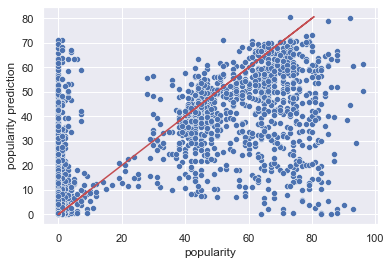

,true,pred
88006,2,10.063500
64985,0,10.040000
88631,0,33.875857
16872,5,12.213667
65959,45,49.035000
...,...,...
65380,53,49.345000
64091,0,0.597243
19486,0,0.451297
19109,0,4.284500


In [33]:
rf_model = RandomForestRegressor(n_jobs=-1).fit(X_train,y_train)
prediction = rf_model.predict(X_test)
r2 = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
print(r2 , mse,mae) 
 
ax = sns.scatterplot(x=y_test, y=prediction)
ax.plot(prediction, prediction, 'r')
ax.set_ylabel('popularity prediction')
plt.show()

df = {"true" : y_test , "pred" : prediction}
df = pd.DataFrame(df)
df

# Deuxième regression avec données mise à l'échelle

In [78]:
from sklearn.preprocessing import MinMaxScaler

data_scaled = data.copy()
scaler = MinMaxScaler()
num_features = ['popularity','duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
data_scaled[num_features]= scaler.fit_transform(data_scaled[num_features])

X_scaled = data_scaled.drop(['popularity'], axis=1)
y_scaled = data_scaled.popularity

 Toutes les caractéristiques numériques sont maintenant dans une plage de 0 à 1, ce qui facilite la comparaison et la combinaison des différentes caractéristiques pour la construction des modèles de Machine Learning.

In [80]:
np.random.seed(0)
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=0)

rest = run_regresor(dict_regressor,kf,X_scaled,y_scaled)

mse for Linreg is: -0.089 +/- 0.001
mse for kNN is: -0.072 +/- 0.002
mse for SVM is: -0.082 +/- 0.002
mse for DT is: -0.090 +/- 0.001
mse for GBC is: -0.067 +/- 0.001
mse for RF is: -0.052 +/- 0.001
mse for AB is: -0.080 +/- 0.002
mse for LGBMR is: -0.057 +/- 0.001
mse for XG is: -0.057 +/- 0.001


Les meilleurs modèles sont les mêmes

In [81]:
def model_metrics(model, X_test , y_test , decimals = 5, X_train = X_train, y_train = y_train):
    start  = datetime.now()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = np.round(r2_score(y_test, y_pred),decimals)
    ecart = sum(np.abs(y_pred-y_test)<=10)/len(y_test)
    return {'MSE': MSE, "RMSE" : RMSE , 'MAE' : MAE ,
            'R2': R2, 'ecart moins de 0.1' : sum(np.abs(y_pred-y_test)<=0.1)/len(y_test),
            'time': (datetime.now() - start).seconds}

In [82]:

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y_scaled, test_size=0.2)

X_train.shape , y_train.shape, X_test.shape, y_test.shape

((8000, 15), (8000,), (2000, 15), (2000,))

In [83]:
XGB_model = XGBRegressor(n_jobs = -1)
RF_model = RandomForestRegressor(n_jobs=-1)
LGBM_model = LGBMRegressor(n_jobs=-1)



results = pd.DataFrame(
    [
        model_metrics(XGB_model, X_test, y_test ),
        model_metrics(RF_model, X_test , y_test),
        model_metrics(LGBM_model, X_test, y_test)
    ], 
    index = [ 'XGBRegressor','RandomForestRegressor','LGBMRegressor']) \
.reset_index() \
.rename(columns={'index':'model'})


results.sort_values(['MSE', 'RMSE', 'MAE','R2','time','ecart moins de 0.1'])

,model,MSE,RMSE,MAE,R2,ecart moins de 0.1,time
1,RandomForestRegressor,0.018691,0.136715,0.080017,0.80442,0.7365,1
0,XGBRegressor,0.024280,0.155822,0.101889,0.74594,0.6650,0
2,LGBMRegressor,0.040265,0.200660,0.153417,0.57868,0.4435,0


## Deuxième stratégie: Données avec popularité =! 0

### Cross val sans mise à l'échelle

In [85]:
new_data = data[data['popularity'] != 0]
print(len(new_data))

fig = px.histogram(new_data, x="popularity")
fig.show()

6396


In [86]:
from sklearn.preprocessing import MinMaxScaler

new_data_scaled = new_data.copy()
scaler = MinMaxScaler()
num_features = ['popularity','duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
new_data_scaled[num_features]= scaler.fit_transform(new_data_scaled[num_features])

In [87]:
X_scaled = new_data_scaled.drop(['popularity'], axis=1)
y        = new_data.popularity

In [88]:
np.random.seed(0)
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=0)

rest = run_regresor(dict_regressor,kf,X_scaled,y)

mse for Linreg is: -629.270 +/- 15.968
mse for kNN is: -607.270 +/- 14.602
mse for SVM is: -691.059 +/- 11.962
mse for DT is: -846.108 +/- 40.945
mse for GBC is: -520.313 +/- 19.106
mse for RF is: -464.307 +/- 19.315
mse for AB is: -603.709 +/- 25.189
mse for LGBMR is: -476.112 +/- 15.728
mse for XG is: -490.206 +/- 21.746


Toujours les trois modèles  (RF, LGBM, XGB ) qui sont les meilleurs

In [89]:
def model_metrics(model, X_test , y_test , decimals = 5, X_train = X_train, y_train = y_train):
    start  = datetime.now()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = np.round(r2_score(y_test, y_pred),decimals)
    ecart = sum(np.abs(y_pred-y_test)<=10)/len(y_test)
    return {'MSE': MSE, "RMSE" : RMSE , 'MAE' : MAE ,
            'R2': R2, 'ecart moins de 10' : ecart,
            'time': (datetime.now() - start).seconds}

# sploit train test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, test_size=0.2)

X_train.shape , y_train.shape, X_test.shape, y_test.shape


XGB_model = XGBRegressor(n_jobs = -1)
RF_model = RandomForestRegressor(n_jobs=-1)
LGBM_model = LGBMRegressor(n_jobs=-1)


results = pd.DataFrame(
    [
        model_metrics(XGB_model, X_test, y_test ),
        model_metrics(RF_model, X_test , y_test),
        model_metrics(LGBM_model, X_test, y_test)
    ], 
    index = [ 'XGBRegressor','RandomForestRegressor','LGBMRegressor']) \
.reset_index() \
.rename(columns={'index':'model'})


results.sort_values(['MSE', 'RMSE', 'MAE','R2','time','ecart moins de 10'])

,model,MSE,RMSE,MAE,R2,ecart moins de 10,time
1,RandomForestRegressor,362.008801,19.026529,13.555944,0.46245,0.522656,1
0,XGBRegressor,425.642447,20.631104,15.541592,0.36796,0.431250,0
2,LGBMRegressor,525.409558,22.921814,17.736053,0.21981,0.365625,0


Même sans mise à l'échelle, il suffit de supprimer les popularités nulles pour obtenir de meilleurs résultats.

### Validation croisée avec X_scaled et y_scaled

In [92]:
X_scaled = new_data_scaled.drop(['popularity'], axis=1)
y_scaled = new_data_scaled.popularity

In [93]:
np.random.seed(0)
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=0)

rest = run_regresor(dict_regressor,kf,X_scaled,y_scaled)

mse for Linreg is: -0.064 +/- 0.002
mse for kNN is: -0.062 +/- 0.001
mse for SVM is: -0.061 +/- 0.002
mse for DT is: -0.087 +/- 0.004
mse for GBC is: -0.053 +/- 0.002
mse for RF is: -0.047 +/- 0.002
mse for AB is: -0.062 +/- 0.003
mse for LGBMR is: -0.049 +/- 0.002
mse for XG is: -0.050 +/- 0.002


In [95]:
def model_metrics(model, X_test , y_test , decimals = 5, X_train = X_train, y_train = y_train):
    start  = datetime.now()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = np.round(r2_score(y_test, y_pred),decimals)
    ecart = sum(np.abs(y_pred-y_test)<=10)/len(y_test)
    return {'MSE': MSE, "RMSE" : RMSE , 'MAE' : MAE ,
            'R2': R2, 'ecart moins de 0.1' : sum(np.abs(y_pred-y_test)<=0.1)/len(y_test),
            'time': (datetime.now() - start).seconds}


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y_scaled, test_size=0.2)

X_train.shape , y_train.shape, X_test.shape, y_test.shape


XGB_model = XGBRegressor(n_jobs = -1)
RF_model = RandomForestRegressor(n_jobs=-1)
LGBM_model = LGBMRegressor(n_jobs=-1)


results = pd.DataFrame(
    [
        model_metrics(XGB_model, X_test, y_test ),
        model_metrics(RF_model, X_test , y_test),
        model_metrics(LGBM_model, X_test, y_test)
    ], 
    index = [ 'XGBRegressor','RandomForestRegressor','LGBMRegressor']) \
.reset_index() \
.rename(columns={'index':'model'})


results.sort_values(['MSE', 'RMSE', 'MAE','R2','time','ecart moins de 0.1'])

,model,MSE,RMSE,MAE,R2,ecart moins de 0.1,time
1,RandomForestRegressor,0.014960,0.122309,0.073373,0.78052,0.767969,1
0,XGBRegressor,0.015809,0.125734,0.078002,0.76806,0.756250,0
2,LGBMRegressor,0.028479,0.168757,0.119100,0.58218,0.571094,0


Finalement, j'ai  décidé de travailler avec toutes les données avec X_scaling et y_scaled et nous sélectionnons RF et XGB pour faire de la recherche en grille.

## GridSearch pour RandomForest and XGBoosting

In [96]:
from sklearn.preprocessing import MinMaxScaler

data_scaled = data.copy()
scaler = MinMaxScaler()
num_features = ['popularity','duration_ms','danceability','energy','loudness',
                'speechiness','acousticness','instrumentalness','liveness','valence','tempo']
data_scaled[num_features]= scaler.fit_transform(data_scaled[num_features])

X_scaled = data_scaled.drop(['popularity'], axis=1)
y_scaled = data_scaled.popularity

# rep du  train test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y_scaled, test_size=0.2)

X_train.shape , y_train.shape, X_test.shape, y_test.shape

((8000, 15), (8000,), (2000, 15), (2000,))

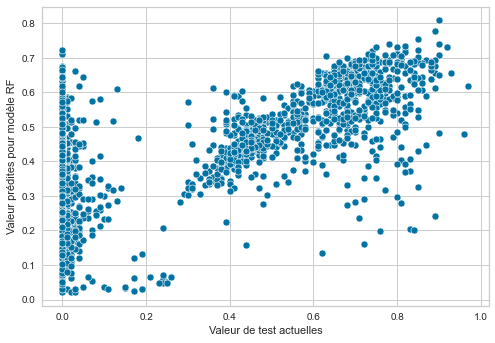

In [129]:

ax = sns.scatterplot(x=y_test, y=y_pred)
ax.set(xlabel='Valeur de test actuelles', ylabel='Valeur prédites pour modèle RF')
plt.show()

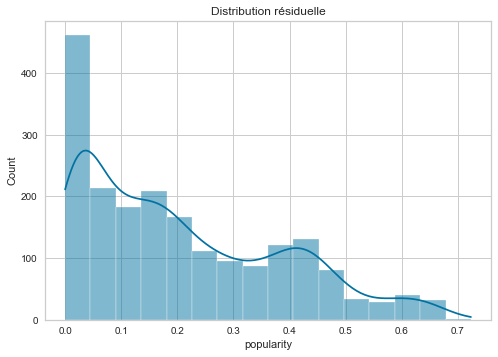

In [117]:
ax = sns.histplot(np.abs(y_pred - y_test), kde = True)
ax.set(title='Distribution résiduelle')
plt.show() 

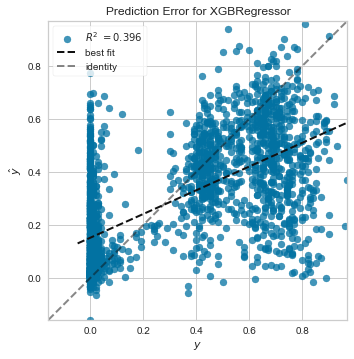

<Axes: title={'center': 'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [128]:
model = XGBRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()     

In [119]:
series = np.abs(np.abs(data.corr())['popularity']).sort_values(ascending=False)
print('Les features les plus corrélées avec la variable POPULARITY sont:')
for i, row in enumerate(series):
    if 0.2 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

Les features les plus corrélées avec la variable POPULARITY sont:
loudness          -->  0.21 (abs)
acousticness      -->  0.21 (abs)
energy            -->  0.21 (abs)


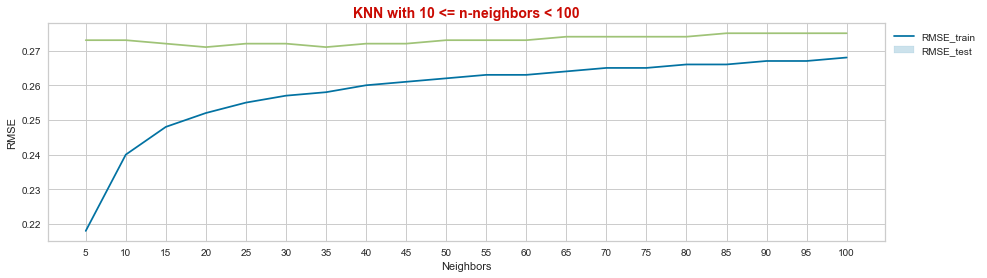

In [112]:
RMSE1_train, RMSE1_test = [], []
from sklearn.metrics import mean_squared_error as mse

for i in range(5,101,5):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_train_pred = knn.predict(X_train)
  knn_train_rmse = np.sqrt(mse(y_train, y_train_pred))
  RMSE1_train.append(knn_train_rmse.round(3))
  y_test_pred = knn.predict(X_test)
  knn_test_rmse = np.sqrt(mse(y_test, y_test_pred))
  RMSE1_test.append(knn_test_rmse.round(3))
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(5, 101, 5)
ax = sns.lineplot(x=x, y=RMSE1_train)
sns.lineplot(x=x, y=RMSE1_test, ax=ax)
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Neighbors')
ax.set_ylabel('RMSE')
ax.set_xticks(np.arange(5,101,5))
ax.set_title('KNN with 10 <= n-neighbors < 100', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

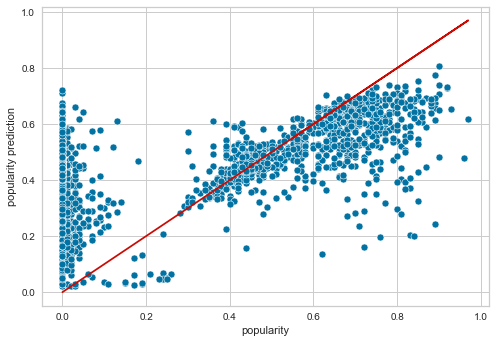

In [113]:
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.plot(y_test, y_test, 'r')
ax.set_ylabel('popularity prediction')
plt.show()

In [115]:
# essai sur DTR
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
train_rmse = (mean_squared_error(y_train, y_train_pred))
y_test_pred = tree.predict(X_test)
test_rmse = (mean_squared_error(y_test, y_test_pred))
print(f'train: {train_rmse}')
print(f'test: {test_rmse}')

train: 0.003060089451629839
test: 0.09439343757264515
